In [1]:
import mushdynamics as md

# Mush dynamics and compaction

## How to use the package

For installation, please refer to the README of the main package. 

To use the functions in the package, import it as (for example)

> import mushdynamics as md


## Run one simulation

Two options are useful here: 

N_max is the number of points in the system (at the end of the run). In order to run examples with small compaction lenght, it is good to increase this value. Be careful that a too large value may increase the running time by too much or use too much available computational power. 

N_fig is the number of outputs. By default, the system outputs some statistics in the statistics file (one line per time step). It also output the complete profiles for velocity and porosity for some time steps, and the number of time steps for output is N_fig. (it also always print the final state of the system)

In [28]:
## The scripts here are also in the folder ./script/runs.py

def run(options):
    """ Run a model with the provided options"""
    print(options)
    model = md.growth.Compaction(md.mush.velocity_Sramek, **options)
    model.run()
    
def param_growth(r, exp, t_max, n=3, N_fig=5, basefolder="", R_init=1e-3, N_max=5000):
    dt = t_max/N_fig
    folder_name = basefolder+"/exp_{:.2e}_t_max_{:.2e}_radius_{:.2e}".format(exp, t_max, r)
    options = {'advection': "FLS",
                'n': n,
                'delta': 1.,  #should always be 1, as it is the caracteristic lengthscale of the system.
                'eta': 1., # should always be 1
                'psi0': 1., # 1-phi at the bottom
                'psiN': 0.6, # 1-phi at the top
                'phi_init': 0.4, # initial value of phi
                'K0': 1., #should always be 1
                'sign': 1., #sign of the density difference. 1 or -1
                'BC': "dVdz==0",   # boundary condition. Required for compaction with flows allowed at the top
                'coordinates': "spherical",  # geometry of the system. "cartesian" for an infinite horizontal layer.
                "growth_rate_exponent": exp,
                'filename': 'IC',
                'time_max': t_max,
                'dt_print': dt,
                'output': folder_name,
                "R_init": R_init*r, 
                "N_init": max(5, int(N_max*R_init)),
                "Ric_adim": r}
    return options

options = param_growth(10., 1., 1000., N_fig=5, basefolder="./test/", R_init=5e-3, N_max=1000)
run(options)

{'advection': 'FLS', 'n': 3, 'delta': 1.0, 'eta': 1.0, 'psi0': 1.0, 'psiN': 0.6, 'phi_init': 0.4, 'K0': 1.0, 'sign': 1.0, 'BC': 'dVdz==0', 'coordinates': 'spherical', 'growth_rate_exponent': 1.0, 'filename': 'IC', 'time_max': 1000.0, 'dt_print': 200.0, 'output': './test//exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01', 'R_init': 0.05, 'N_init': 5, 'Ric_adim': 10.0}


output is then in the folder ./test/: 

In [29]:
from glob import glob
print(glob("./test/*"))
print(glob("./test/*/*"))

['./test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01']
['./test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/IC_statistics.txt', './test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/output_400.10000000.timestep', './test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/IC_param.yaml', './test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/output_600.10000000.timestep', './test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/output_200.10000000.timestep', './test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/output_800.10000000.timestep']


## Figures obtained from the run 

First we need to extract the different file names:

In [30]:
import os, re, yaml

regex = re.compile(r'\d+')
def find_float(filename):
    numbers = regex.findall(filename) # gives 2 numbers as number with format "1.05" returns 1 and 05
    return float(numbers[0] + '.' + numbers[1])

def extract_files(subfolder):
        list_files = os.listdir(subfolder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = subfolder + "/" + file
            elif file[-9:] == ".timestep":
                _name = subfolder + "/" + file
                _time = find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                with open(subfolder + "/" + file, 'r') as stream:
                    try:
                        param = yaml.safe_load(stream)
                    except yaml.YAMLError as exc:
                        print(exc)
        return file_stat, param, timesteps

In [33]:
folder = glob("./test/*")[0]  #by default here, we extract the first folder. 
# (be careful if you changed the parameters above and have several output folders)
stat, param, timesteps = extract_files(folder)
print("Folder name: {}".format(folder))
print("Statistic file: {}".format(stat))
print("Parameters: {}".format(param))
print("List of time steps: {}".format(sorted(timesteps.values())))

Folder name: ./test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01
Statistic file: ./test/exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01/IC_statistics.txt
Parameters: {'BC': 'dVdz==0', 'K0': 1.0, 'N_init': 5, 'R_init': 0.05, 'Ric_adim': 10.0, 'advection': 'FLS', 'coeff_velocity': 0.01, 'coordinates': 'spherical', 'delta': 1.0, 'dt_print': 200.0, 'eta': 1.0, 'filename': 'IC', 'growth_rate_exponent': 1.0, 'n': 3, 'output': './test//exp_1.00e+00_t_max_1.00e+03_radius_1.00e+01', 'phi_init': 0.4, 'psi0': 1.0, 'psiN': 0.6, 'sign': 1.0, 't_init': 5.0, 'time_max': 1000.0}
List of time steps: [200.1, 400.1, 600.1, 800.1]


Text(0.5, 1.0, 'Statistics file')

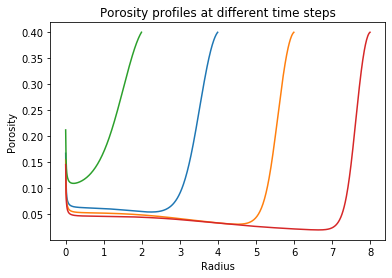

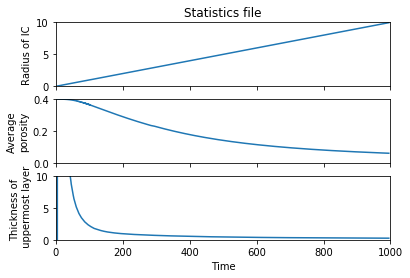

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel("Radius")
ax.set_ylabel("Porosity")
ax.set_title("Porosity profiles at different time steps")

for file in timesteps.items(): 
    data = pd.read_csv(file[0], sep=" ")
    porosity = data["porosity"]
    radius = data["radius"]
    time = file[1]
    ax.plot(radius, porosity)
    
fig, ax = plt.subplots(3, sharex=True)

data = pd.read_csv(stat, sep=" ")
#print(data.columns)

ax[1].plot(data["time"], data["sum_phi"])
ax[2].plot(data["time"], data["thickness_boundary"])
ax[0].plot(data["time"], data['radius'])

ax[0].set_ylim([0, param["Ric_adim"]])
ax[1].set_ylim([0, 1.-param["psiN"]])
ax[2].set_ylim([0, param["Ric_adim"]])
ax[2].set_xlim([0, param["time_max"]])

ax[2].set_xlabel("Time")
ax[0].set_ylabel("Radius of IC")
ax[1].set_ylabel("Average\nporosity")
ax[2].set_ylabel("Thickness of \n uppermost layer")

ax[0].set_title("Statistics file")

## Some examples of figures from the package



### Numerical scheme for the discretization of the equations

In [14]:
md.mush.schema()

 <-1 volume-> 
||-----.-----|-----.-----|       ...      .-----|-----.-----|-----.        ...       -----.-----|-----.-----||  
       0     0     1     1                                                                N-1  N-1    N          
 0   1/2dr  dr   3/2dr              |           |           |                       |           |                
             ->          ->               |     ->    |     ->    |                       |     ->    |            
 V0          V1          V2               |    V_i-1  |    V_i    |                       |    V_N-1  |     V_N   
      phi0        phi1                  phi_i-1     phi_i      phi_i+1                phi_N-1      phi_N         
            DP0         DP1                  DP_i-1                                           DP_N-1           



### Growth scenarios for the inner core

Dt supercooling 0.48899999999999993
1.0
0.5


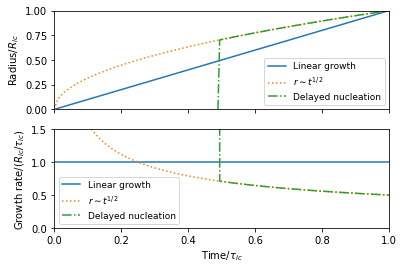

In [18]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # for the sake of lisibility, we remove the warnings here
    md.growth.plot_growth([6, 4])